## Assignment-2
### Question 2.c

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

In [17]:
def polynomial(values, coeffs):
    assert len(values.shape) == 2
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = coeffs[np.newaxis,:] * (values ** np.arange(len(coeffs))[np.newaxis,:])
    return np.sum(expanded, axis=-1)

In [18]:
def polynomial_data(coeffs, n_data=100, x_range=[-1, 1], eps=0.1):
    x = np.random.uniform(x_range[0], x_range[1], n_data)[:,np.newaxis]
    poly = polynomial(x, coeffs)
    noisy_poly = poly + eps * np.random.standard_normal(size=poly.shape)
    return x, noisy_poly

In [19]:
def least_squares(x, y):
    xTx = x.T.dot(x)
    xTx_inv = np.linalg.inv(xTx)
    w = xTx_inv.dot(x.T.dot(y))
    return w

In [20]:
def least_squaresL2(x, y, Penalty_factor):
    xTx = x.T.dot(x)
    xTx += np.identity(xTx.shape[0])*Penalty_factor
    xTx_inv = np.linalg.inv(xTx)
    w = xTx_inv.dot(x.T.dot(y))
    return w

In [21]:
np.random.seed(100)
# 1 + w * x
coeffs = np.array([0., 5.0/60.0])
x, y = polynomial_data(coeffs, 50)

In [22]:
def plot_polynomial(coeffs, x_range=[-1, 1], color='red', label='polynomial', alpha=1.0):
    values = np.linspace(x_range[0], x_range[1], 1000).reshape([-1, 1])
    poly = polynomial(values, coeffs)
    plt.plot(values, poly, color=color, linewidth=2, label=label, alpha=alpha)

In [23]:
x_train = np.array([[1.0],[3.0]])
y_train = np.array([[1.0/3],[1.0/6]])

In [24]:
wmle = least_squares(x_train,y_train)[0][0]

In [25]:
wmap = least_squaresL2(x_train,y_train,1)[0][0]
sigma = np.sqrt(1.0/(x_train.T.dot(x_train) + 1))[0][0]

In [26]:
def plot_line(slope,bias):
    x = np.linspace(-5,5,100)
    y = slope*x + bias
    return (x,y)

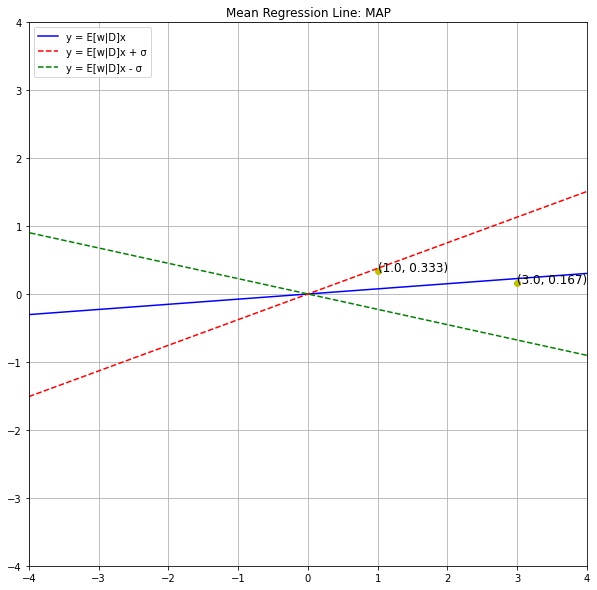

In [27]:
plt.figure(figsize=(10, 10))
coef =[0,wmap]
plt.plot(x_train,y_train, 'yo')
for point in range(len(x_train)):
    plt.annotate((x_train[point][0], np.round(y_train[point][0],3)),(x_train[point], y_train[point]), fontsize=12)
space1 = plot_line(wmap,0)
space2 = plot_line(wmap+sigma,0)
space3 = plot_line(wmap-sigma,0)
plt.plot(space1[0], space1[1] ,'-b',label="y = E[w|D]x")
plt.plot(space2[0], space2[1] ,'--r',label="y = E[w|D]x + σ")
plt.plot(space3[0], space3[1] ,'--g',label="y = E[w|D]x - σ")
plt.legend(loc="upper left")
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.title("Mean Regression Line: MAP")
plt.grid()

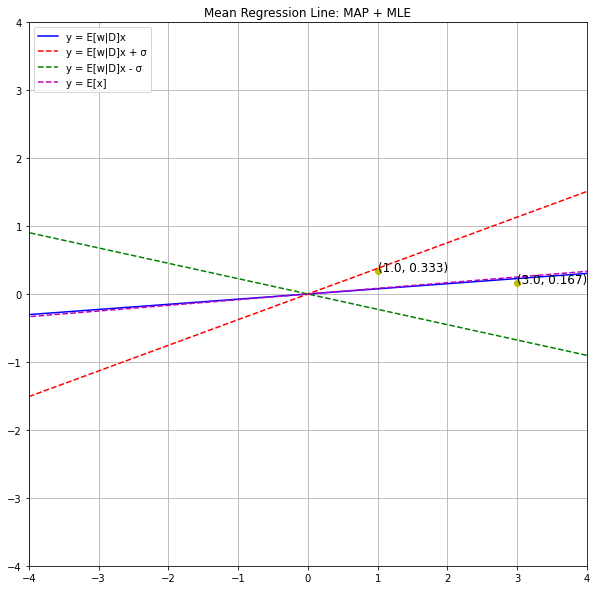

In [28]:
plt.figure(figsize=(10, 10))
coef =[0,wmap]
plt.plot(x_train,y_train, 'yo')
for point in range(len(x_train)):
    plt.annotate((x_train[point][0], np.round(y_train[point][0],3)),(x_train[point], y_train[point]), fontsize=12)
space1 = plot_line(wmap,0)
space2 = plot_line(wmap+sigma,0)
space3 = plot_line(wmap-sigma,0)
space4 = plot_line(wmle,0)
plt.plot(space1[0], space1[1] ,'-b',label="y = E[w|D]x")
plt.plot(space2[0], space2[1] ,'--r',label="y = E[w|D]x + σ")
plt.plot(space3[0], space3[1] ,'--g',label="y = E[w|D]x - σ")
plt.plot(space4[0], space4[1] ,'--m',label="y = E[x]")
plt.legend(loc="upper left")
plt.title("Mean Regression Line: MAP + MLE")
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.grid()